# Deep Learning - Homework

## Dataset

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. For this, we will use the "Bee or Wasp?" dataset that was obtained from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) and slightly rebuilt.

## Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps.

The dataset contains separate folders for training and test sets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-19 15:52:43.433209: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Model

For this homework we will use Convolutional Neural Network (CNN) and Keras to build it.

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

2023-11-19 15:52:45.268737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 15:52:45.275570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 15:52:45.275817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 15:52:45.276733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

### Question 1

Since we have a binary classification problem, what is the best loss function for us?
* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

For binary classification problem we can use `binary crossentropy` loss funtion.

### Question 2

What's the number of parameters in the convolutional layer of our model?
* 1
* 65
* 896
* 11214912

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Convolutional layer has 896 parameters.

## Generators and Training

In [5]:
gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_ds = gen.flow_from_directory(
    './data/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [7]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [8]:
X, y = next(train_ds)

In [9]:
y[:5]

array([0., 0., 1., 1., 0.], dtype=float32)

In [10]:
test_ds = gen.flow_from_directory(
    './data/test',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 920 images belonging to 2 classes.


In [11]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2023-11-19 15:52:47.623508: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-19 15:52:48.268898: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 15:52:48.269509: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 15:52:48.269545: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-19 15:52:48.270058: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 15:52:48.270118: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 12s 51ms/step - loss: 0.6815 - accuracy: 0.5586 - val_loss: 0.6443 - val_accuracy: 0.6446
Epoch 2/10
184/184 [==============================] - 9s 49ms/step - loss: 0.6457 - accuracy: 0.6187 - val_loss: 0.6121 - val_accuracy: 0.5935
Epoch 3/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5930 - accuracy: 0.6823 - val_loss: 0.5642 - val_accuracy: 0.7000
Epoch 4/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5457 - accuracy: 0.7376 - val_loss: 0.5337 - val_accuracy: 0.7424
Epoch 5/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5154 - accuracy: 0.7479 - val_loss: 0.5380 - val_accuracy: 0.7337
Epoch 6/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4877 - accuracy: 0.7737 - val_loss: 0.5248 - val_accuracy: 0.7467
Epoch 7/10
184/184 [==============================] - 9s 50ms/step - loss: 0.4602 - accuracy: 0.7968 - val_loss: 0.4989 - val_accuracy: 0.7674
Epoch 8/1

### Question 3

What is the median of training accuracy for all the epochs for this model?
* 0.20
* 0.40
* 0.60
* 0.80

In [12]:
np.median(history.history['accuracy']).round(2)

0.76

The median of training accuracy for all the epochs is closed to 0.80

### Question 4

What is the standard deviation of training loss for all the epochs for this model?
* 0.031
* 0.061
* 0.091
* 0.131

In [13]:
np.std(history.history['loss']).round(3)

0.095

The standard deviation of training loss for all the epochs is closed to 0.091

## Data Augmentation

In [14]:
gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
train_ds = gen.flow_from_directory(
    './data/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 3677 images belonging to 2 classes.


### Question 5

Let's train our model for 10 more epochs using the same code as previously.

What is the mean of test loss for all the epochs for the model trained with augmentations?
* 0.18
* 0.48
* 0.78
* 0.108

In [16]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 25s 135ms/step - loss: 0.5115 - accuracy: 0.7490 - val_loss: 0.4857 - val_accuracy: 0.7674
Epoch 2/10
184/184 [==============================] - 25s 134ms/step - loss: 0.5022 - accuracy: 0.7626 - val_loss: 0.4698 - val_accuracy: 0.7848
Epoch 3/10
184/184 [==============================] - 25s 134ms/step - loss: 0.4791 - accuracy: 0.7808 - val_loss: 0.4689 - val_accuracy: 0.7793
Epoch 4/10
184/184 [==============================] - 25s 134ms/step - loss: 0.4721 - accuracy: 0.7707 - val_loss: 0.5093 - val_accuracy: 0.7620
Epoch 5/10
184/184 [==============================] - 25s 135ms/step - loss: 0.4704 - accuracy: 0.7819 - val_loss: 0.4597 - val_accuracy: 0.7870
Epoch 6/10
184/184 [==============================] - 25s 135ms/step - loss: 0.4729 - accuracy: 0.7808 - val_loss: 0.4755 - val_accuracy: 0.7826
Epoch 7/10
184/184 [==============================] - 24s 133ms/step - loss: 0.4652 - accuracy: 0.7854 - val_loss: 0.4621 - val_ac

In [17]:
np.mean(history.history['val_loss']).round(3)

0.481

The mean of test loss for all the epochs is closed to 0.48

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?
* 0.38
* 0.58
* 0.78
* 0.98

In [18]:
np.mean(history.history['val_accuracy'][5:]).round(3)

0.778

The average of test accuracy for the last 5 epochs is 0.78

## Testing

In [19]:
from tensorflow.keras.preprocessing.image import load_img

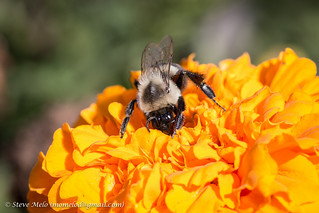

In [20]:
path = './data/test/bee/10024864894_6dc54d4b34_n.jpg'
load_img(path)

In [21]:
img = load_img(path, target_size=(150, 150))
x = np.array(img)
x.shape

(150, 150, 3)

In [22]:
X = np.array([x])
pred = (model.predict(X) > 0.5).astype('int')
if pred == 1:
    print("It's a wasp!")
else:
    print("It's a bee!")

1/1 [==============================] - 0s 96ms/step
It's a bee!
